<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

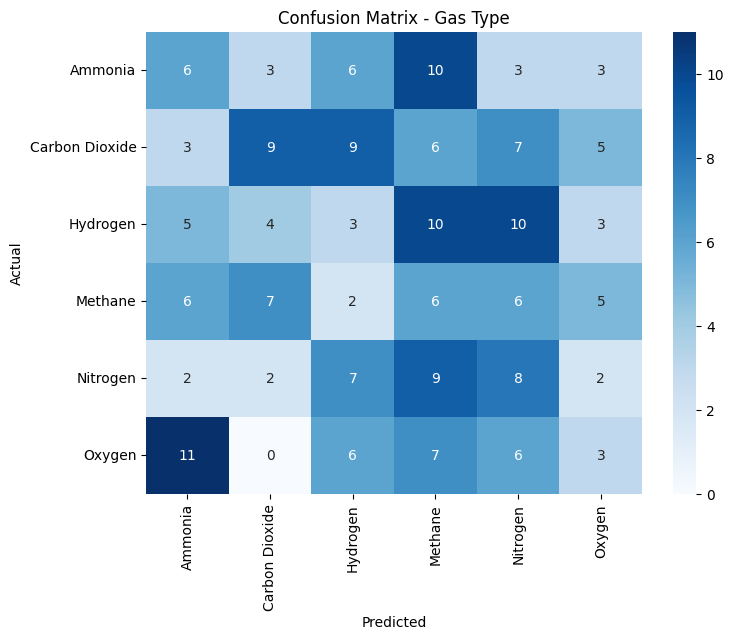


Gas Type Classification Report:
                 precision    recall  f1-score   support

       Ammonia       0.18      0.19      0.19        31
Carbon Dioxide       0.36      0.23      0.28        39
      Hydrogen       0.09      0.09      0.09        35
       Methane       0.12      0.19      0.15        32
      Nitrogen       0.20      0.27      0.23        30
        Oxygen       0.14      0.09      0.11        33

      accuracy                           0.17       200
     macro avg       0.18      0.18      0.17       200
  weighted avg       0.19      0.17      0.18       200



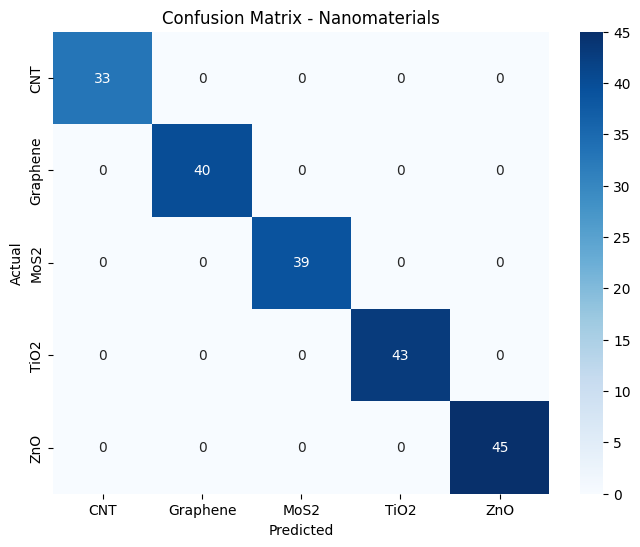


Nanomaterial Classification Report:
               precision    recall  f1-score   support

         CNT       1.00      1.00      1.00        33
    Graphene       1.00      1.00      1.00        40
        MoS2       1.00      1.00      1.00        39
        TiO2       1.00      1.00      1.00        43
         ZnO       1.00      1.00      1.00        45

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Number of misclassifications for gas types: 165
Number of misclassifications for nanomaterials: 0


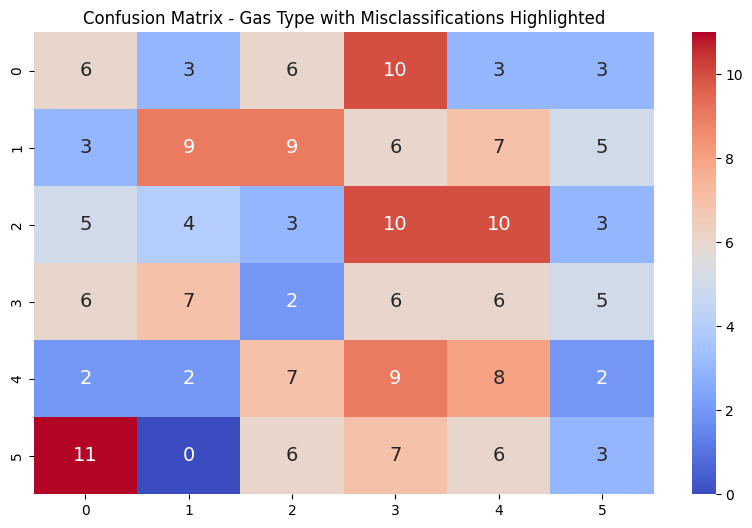

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('gas_sensor_readings_with_nanomaterials.csv')

# Encode categorical columns
label_encoder_gas = LabelEncoder()
df['Gas_Type'] = label_encoder_gas.fit_transform(df['Gas_Type'])
label_encoder_material = LabelEncoder()
df['Nanomaterial'] = label_encoder_material.fit_transform(df['Nanomaterial'])

# Features and labels
X = df[['Sensor_Reading', 'Temperature', 'Nanomaterial', 'Efficiency (%)', 'Power_Dissipation (mW)']]
y_gas = df['Gas_Type']
y_material = df['Nanomaterial']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_gas_train, y_gas_test, y_material_train, y_material_test = train_test_split(
    X, y_gas, y_material, test_size=0.2, random_state=42
)

# Train a model for gas type classification
from sklearn.ensemble import RandomForestClassifier
rf_classifier_gas = RandomForestClassifier(random_state=42)
rf_classifier_gas.fit(X_train, y_gas_train)

# Predict gas types
y_gas_pred = rf_classifier_gas.predict(X_test)

# Confusion Matrix for Gas Type
conf_matrix_gas = confusion_matrix(y_gas_test, y_gas_pred)

# Plot confusion matrix for gas type
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_gas, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder_gas.classes_, yticklabels=label_encoder_gas.classes_)
plt.title('Confusion Matrix - Gas Type')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report for Gas Type
print("\nGas Type Classification Report:\n", classification_report(y_gas_test, y_gas_pred, target_names=label_encoder_gas.classes_))

# Train a model for Nanomaterial classification
rf_classifier_material = RandomForestClassifier(random_state=42)
rf_classifier_material.fit(X_train, y_material_train)

# Predict nanomaterials
y_material_pred = rf_classifier_material.predict(X_test)

# Confusion Matrix for Nanomaterials
conf_matrix_material = confusion_matrix(y_material_test, y_material_pred)

# Plot confusion matrix for nanomaterials
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_material, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder_material.classes_, yticklabels=label_encoder_material.classes_)
plt.title('Confusion Matrix - Nanomaterials')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report for Nanomaterials
print("\nNanomaterial Classification Report:\n", classification_report(y_material_test, y_material_pred, target_names=label_encoder_material.classes_))

# Analysis of misclassifications
misclassified_gas = np.where(y_gas_test != y_gas_pred)[0]
print(f"\nNumber of misclassifications for gas types: {len(misclassified_gas)}")
misclassified_material = np.where(y_material_test != y_material_pred)[0]
print(f"Number of misclassifications for nanomaterials: {len(misclassified_material)}")

# Additional Visual Analysis for Misclassifications (Optional):
# Visualize how often specific gas types are misclassified by overlaying the matrix values
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix_gas, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size": 14})
plt.title('Confusion Matrix - Gas Type with Misclassifications Highlighted')
plt.show()
